## Normality Test

- Portfolio theory
- Capital asset pricing model
- Efficeint Markets hypothesis
- Option Pricing Theory

## Benchmark Case

Normal log return 
Log - normal values

In [24]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
from pylab import mpl, plt

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [7]:
def gen_paths(S0,r,sigma, T,M,I):
    '''Generate Monte Carlo paths for geometric Brownian motion.
    
    Paramters
    =========
    S0: float
        inital stock/indexvalue
    r: float
        constant short rate
    sigma: float
        constant volatility
    T:float
        final time horizon
    M:int
        number of time steps/intervals
    I:int
        number of paths to be simulated
    
    Returns
    ======
    paths: ndarry, shape(M+1, I)
        simulated paths given the parameters
    '''
    dt = T/M
    paths = np.zeros((M+1,I))
    paths[0] = S0
    for t in range(1, M+1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t-1]*np.exp((r-0.5 * sigma **2)*dt + sigma *math.sqrt(dt)*rand)
    return paths
        
        
    

In [8]:
 S0 = 100. 
 r = 0.05 
 sigma = 0.2 
 T = 1.0 
 M = 50 
 I = 250000 
 np.random.seed(1000)

In [9]:
paths = gen_paths(S0, r, sigma, T, M, I)


In [10]:
S0 * math.exp(r * T)

105.12710963760242

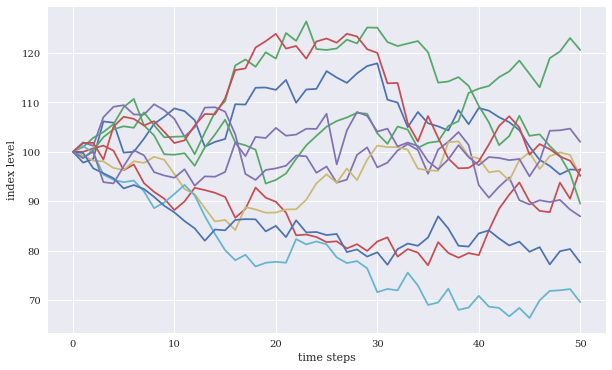

In [11]:
 plt.figure(figsize=(10, 6))
 plt.plot(paths[:, :10])
 plt.xlabel('time steps')
 plt.ylabel('index level');

In [12]:
paths[:,0].round(4)

array([100.    ,  97.821 ,  98.5573, 106.1546, 105.899 ,  99.8363,
       100.0145, 102.6589, 105.6643, 107.1107, 108.7943, 108.2449,
       106.4105, 101.0575, 102.0197, 102.6052, 109.6419, 109.5725,
       112.9766, 113.0225, 112.5476, 114.5585, 109.942 , 112.6271,
       112.7502, 116.3453, 115.0443, 113.9586, 115.8831, 117.3705,
       117.9185, 110.5539, 109.9687, 104.9957, 108.0679, 105.7822,
       105.1585, 104.3304, 108.4387, 105.5963, 108.866 , 108.3284,
       107.0077, 106.0034, 104.3964, 101.0637,  98.3776,  97.135 ,
        95.4254,  96.4271,  96.3386])

In [14]:
log_returns = np.log(paths[1:]/paths[:-1])
log_returns

array([[-2.20312413e-02,  9.78069275e-03, -1.15698440e-05, ...,
         2.13854584e-02, -3.97235647e-02, -1.33635200e-02],
       [ 7.49889747e-03,  1.81704932e-02,  6.94255706e-03, ...,
         1.23200534e-02, -2.01888834e-02,  1.74350366e-02],
       [ 7.42587147e-02,  1.12835342e-02,  5.59923452e-03, ...,
        -2.31898837e-02,  3.91520262e-02,  1.76673738e-02],
       ...,
       [-1.77563848e-02,  1.13119992e-02,  6.58807811e-02, ...,
         1.76006748e-02, -1.59955832e-02, -2.43877356e-02],
       [ 1.04423228e-02,  2.24426745e-02, -3.54482049e-02, ...,
        -2.96233456e-02,  7.20441229e-02,  2.15468916e-02],
       [-9.18284606e-04, -1.99889384e-02,  6.43176041e-02, ...,
        -2.56038152e-02, -3.63639543e-02, -2.23057191e-02]])

In [16]:
def print_statistics(array):
    ''' Prints selected statistics.
    Parameters
    ==========
    array: ndarray
    object to generate statistics on
    '''
    sta = scs.describe(array)
    print('%14s %15s' % ('statistic', 'value'))
    print(30 * '-')
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))


In [17]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


In [19]:
log_returns.mean()*M+0.5*sigma**2

0.05000000000000006

In [20]:
log_returns.std()*math.sqrt(M)

0.20000000000000015

AttributeError: 'Rectangle' object has no property 'desity'

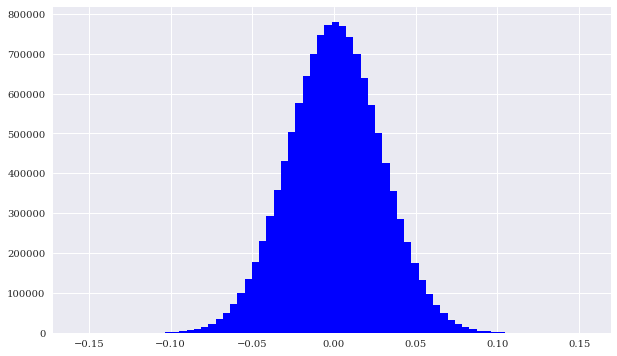

In [28]:
plt.figure(figsize=(10,6))
plt.hist(log_returns.flatten(), bins=70, desity=True, label='frequency', color='b')

plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])

plt.plot(x, scs.norm.pdf(x, loc=r/M, scale=sigma / np.sqrt(M)), 'r', lw=2.0, label='pdf')
plt.legend();



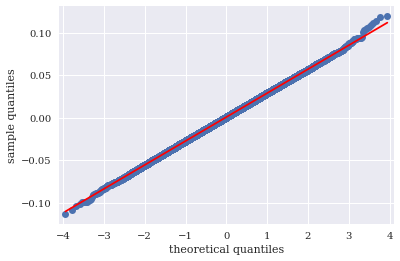

In [29]:
 sm.qqplot(log_returns.flatten()[::500], line='s')
 plt.xlabel('theoretical quantiles')
 plt.ylabel('sample quantiles');


In [ ]:
425